In [1]:
# Imporitng Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set styles
sns.set(style='whitegrid')


In [2]:
from google.colab import files
uploaded = files.upload()  # Upload vgsales.csv manually

df = pd.read_csv('vgsales.csv')
df.head()


Saving vgsales.csv to vgsales (1).csv


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
# Shape and basic info
print("Shape:", df.shape)
df.info()

Shape: (16598, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [4]:
# Check for missing values
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


The dataset has ~16,500 records with a few missing values in Year, Publisher, and Genre, which we'll handle during analysis.


In [5]:
# Descriptive statistics
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Global Sales range from 0 to over 80 million units, with most games selling under 1 million — indicating a heavily right-skewed distribution

Text(0.5, 1.0, 'Distribution of Global Sales')

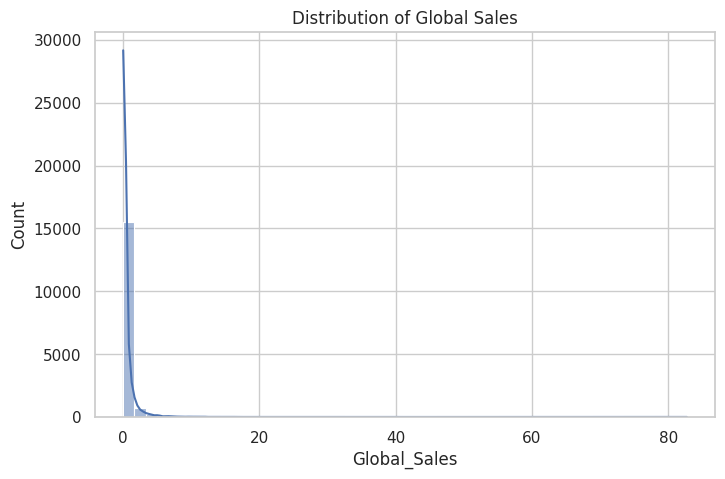

In [21]:
# Global Sales Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Global_Sales'], bins=50, kde=True)
plt.title('Distribution of Global Sales')

The sales distribution confirms that most games are low-sellers, with a small number achieving massive success — typical of power-law behavior.

Text(0.5, 1.0, 'Boxplot of Global Sales')

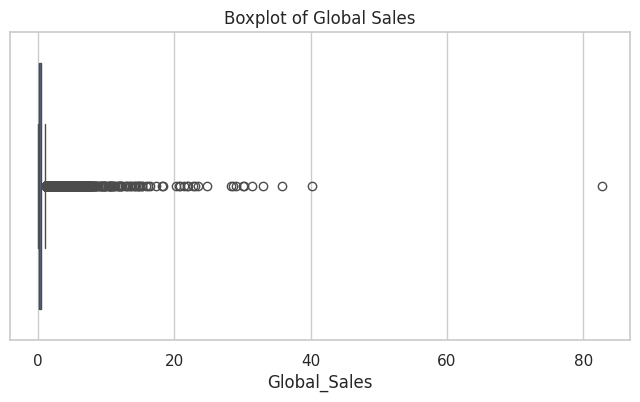

In [7]:
# Boxplot for Outliers
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Global_Sales'])
plt.title('Boxplot of Global Sales')

There are significant outliers in the Global Sales — likely games like Wii Sports or GTA V — which skew the mean upwards.

Text(0.5, 1.0, 'Correlation Matrix')

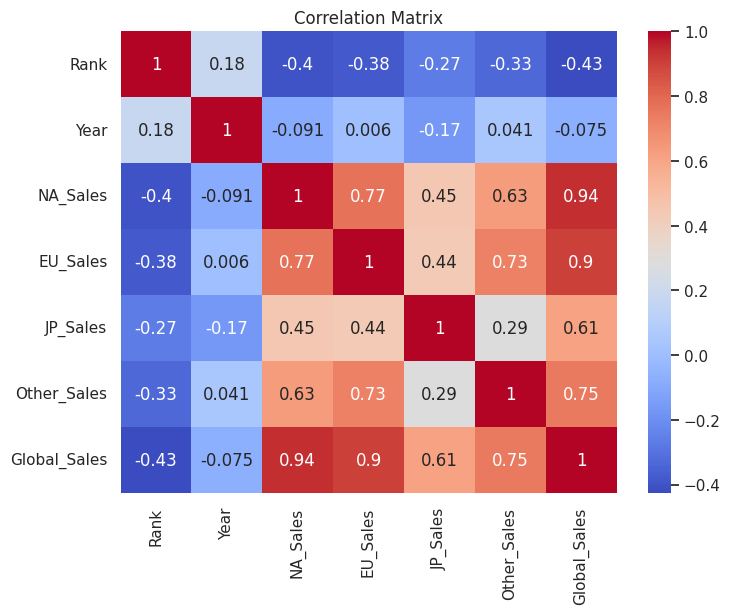

In [9]:
# Numeric columns correlation
plt.figure(figsize=(8,6))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

**Insight**: NA_Sales and EU_Sales have a strong positive correlation with Global_Sales, showing that North America and Europe drive the majority of global performance.

<Axes: title={'center': 'Top Genres by Global Sales'}, xlabel='Genre'>

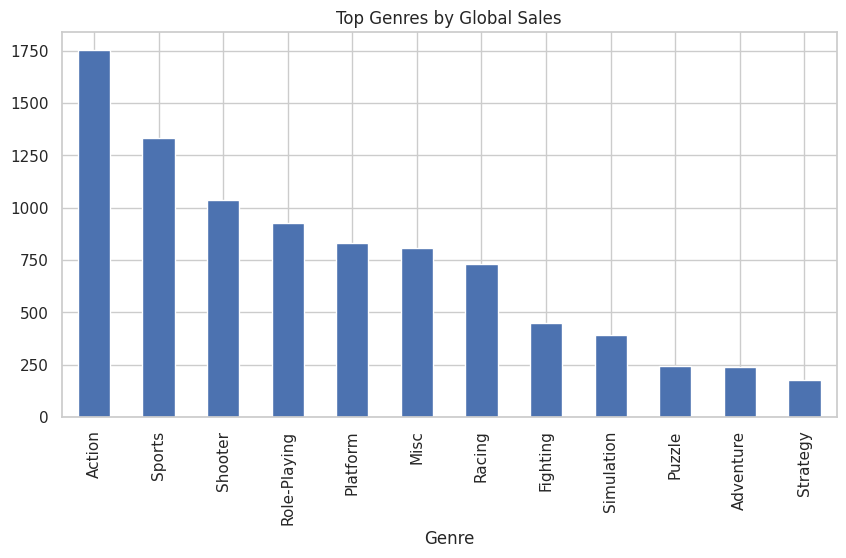

In [10]:
# Top 10 Genres by Global Sales
top_genres = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
top_genres.plot(kind='bar', figsize=(10,5), title='Top Genres by Global Sales')

**Insight**: Action and Sports are the top-performing genres globally, followed closely by Shooter and Role-Playing games.

<Axes: title={'center': 'Top Platforms by Global Sales'}, xlabel='Platform'>

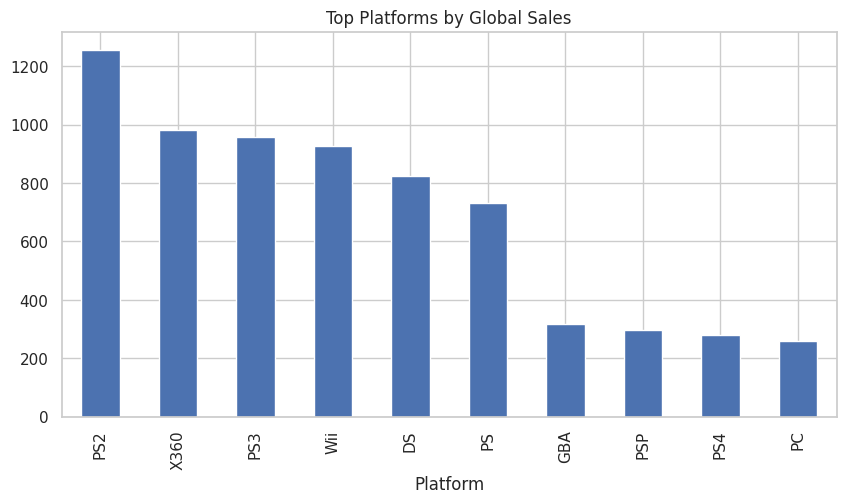

In [11]:
# Top 10 Platforms
top_platforms = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)
top_platforms.plot(kind='bar', figsize=(10,5), title='Top Platforms by Global Sales')

**Insight**: Platforms like PS2, X360, and PS3 dominated game sales historically, showing the impact of hardware success on software revenue

<Axes: title={'center': 'Sales by Region'}>

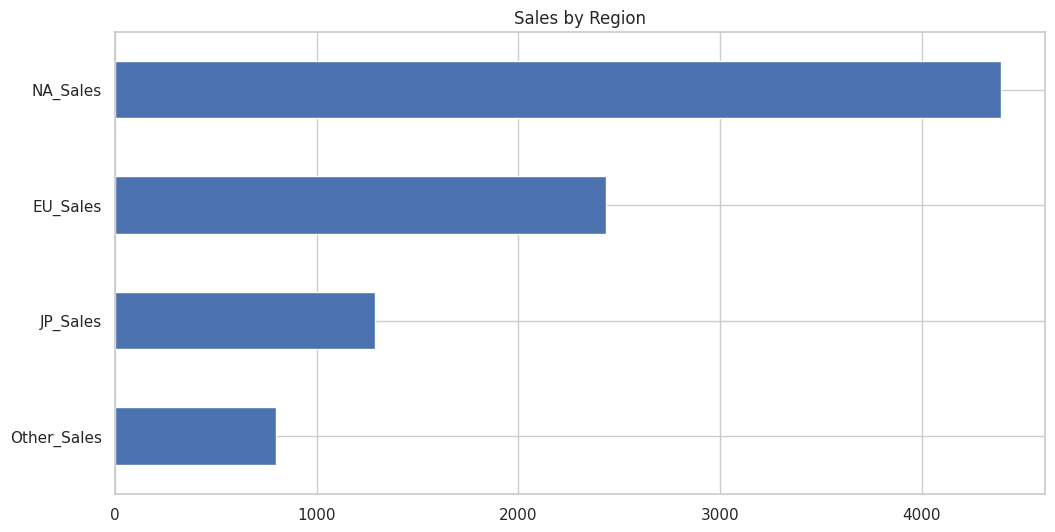

In [12]:
# Regional preferences
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

plt.figure(figsize=(12,6))
df[regions].sum().sort_values().plot(kind='barh', title='Sales by Region')


**Insight**: North America dominates video game sales, followed by Europe and Japan, with 'Other' regions contributing relatively less.

In [15]:
#  Drop missing years and convert to int
df_year = df.dropna(subset=['Year'])
df_year['Year'] = df_year['Year'].astype(int)

# Total sales per year
sales_by_year = df_year.groupby('Year')['Global_Sales'].sum()
print(sales_by_year.sort_values(ascending=False).head())

Year
2008    678.90
2009    667.30
2007    611.13
2010    600.45
2006    521.04
Name: Global_Sales, dtype: float64


<ipython-input-15-89762d76ebae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['Year'] = df_year['Year'].astype(int)


<Axes: title={'center': 'Global Sales Over Time'}, xlabel='Year'>

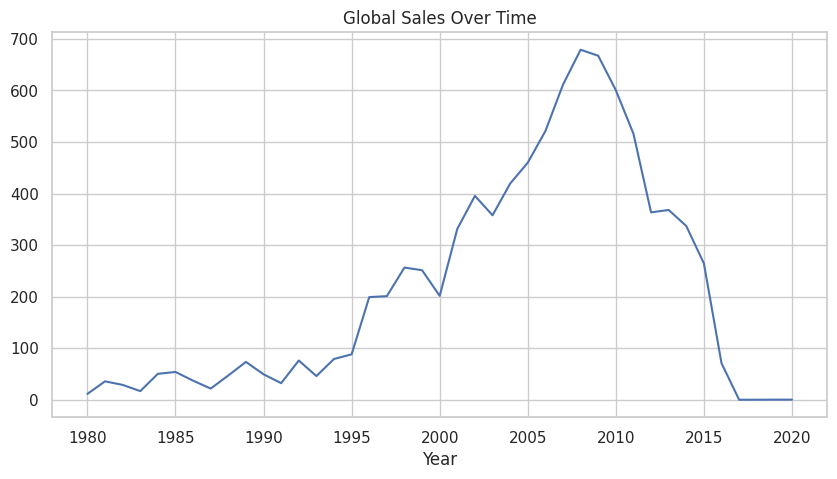

In [16]:
# Line plot
sales_by_year.plot(figsize=(10,5), title='Global Sales Over Time')


**Insight**: Sales peaked in 2008 with a sharp rise during the 2005–2009 period, likely driven by blockbuster releases and console wars (e.g., PS3, Xbox 360, Wii).

<ipython-input-25-8e56ab085402>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=top_games, x='Publisher', y='Global_Sales', estimator=sum, ci=None)


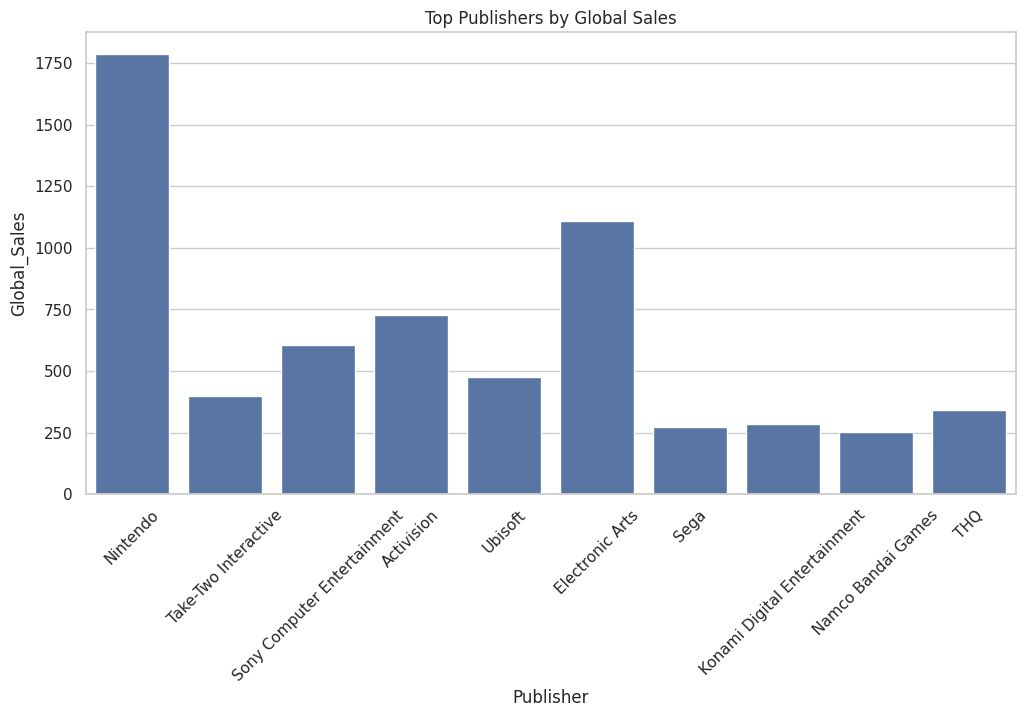

In [25]:
top_publishers = df['Publisher'].value_counts().head(10).index  # Top 10 publishers for more clarity
top_publishers = top_publishers.append(pd.Index(['Nintendo']))  # Ensure Nintendo is always included

top_games = df[df['Publisher'].isin(top_publishers)]

plt.figure(figsize=(12,6))
sns.barplot(data=top_games, x='Publisher', y='Global_Sales', estimator=sum, ci=None)
plt.title('Top Publishers by Global Sales')
plt.xticks(rotation=45)
plt.show()


**Insights**: Major publishers like Nintendo, Electronic Arts, and Activision dominate sales — showing that brand power, as well as legacy franchises, play a massive role in gaming success.

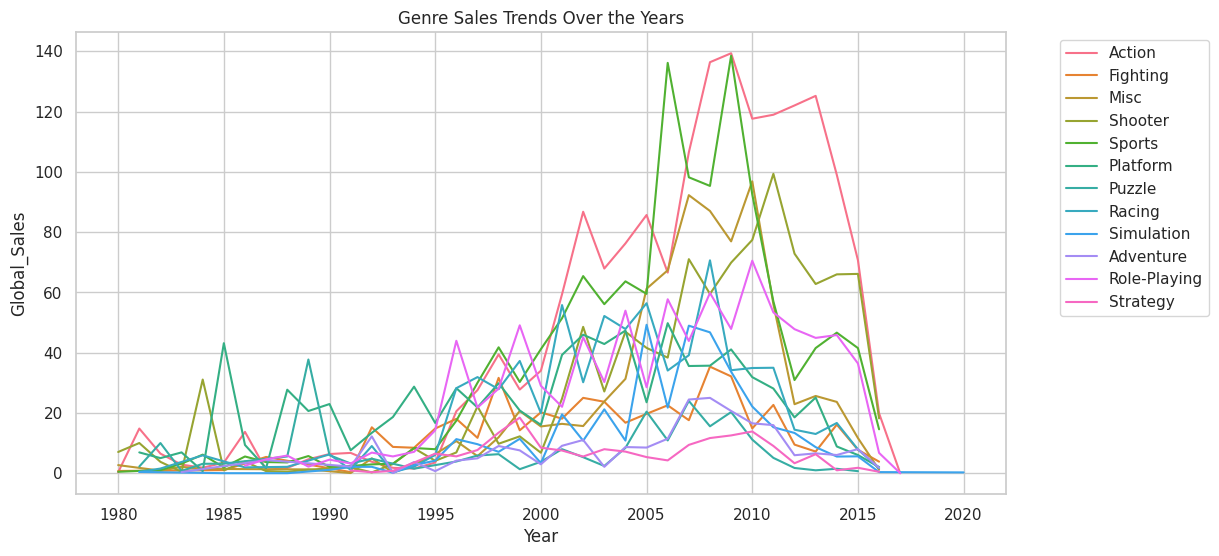

In [24]:
genre_year = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=genre_year, x='Year', y='Global_Sales', hue='Genre')
plt.title('Genre Sales Trends Over the Years')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


**Insights**: Action and Shooter genres saw the highest global sales between 2005 and 2010, but all genres experienced a sharp decline in sales after 2010.

In [26]:
import plotly.express as px

fig = px.treemap(df, path=['Platform', 'Genre'], values='Global_Sales',
                 title='Global Sales by Platform and Genre')
fig.show()



**Insight** :Treemaps help visualize the relative impact of platforms per genre — PS2 dominates Action/Sports, while Wii leads in Family titles.